<a href="https://colab.research.google.com/github/annefrancine/ML---2021-2022/blob/main/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Seaborn**

Seaborn est une bibliothèque permettant de créer des graphiques statistiques en Python. Elle est basée sur Matplotlib, et s’intègre avec les structures Pandas.

Cette bibliothèque est aussi performante que Matplotlib, mais apporte une simplicité et des fonctionnalités inédites. Elle permet d’explorer et de comprendre rapidement les données.

https://seaborn.pydata.org/


## **Dataset Tips**

Il s'agit d'un dataset que la bibliothèque elle-même nous fournit. Il contient des enregistrements de clients pour un restaurant, comme décrit ci-dessous.

* Total_bill: Coût total du repas en dollars

* Tip: Montant du pourboire en dollars.

* Sex: Sexe (féminin / masculin).

* Smoker: Si la zone choisie était destinée aux fumeurs ou non.

* Day: Jour de la semaine

* Time: déjeuner (Lunch) ou dinner (Dinner).

* Size: Taille du repas

In [1]:
import seaborn as sns# charger le package
tips = sns.load_dataset("tips")# charger le dataset
tips.head()# afficher 5 lignes du dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
# résumé statistique
tips.describe(). T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [3]:
#vérifier valeurs manquantes
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [33]:
# créer colonne weekend et vérifier si est true ou false

tips["weekend"] = tips["day"].isin(["Sat","Sun"])
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size,weekend
201,12.74,2.01,Female,Yes,Thur,Lunch,2,False
136,10.33,2.00,Female,No,Thur,Lunch,2,False
234,15.53,3.00,Male,Yes,Sat,Dinner,2,True
62,11.02,1.98,Male,Yes,Sat,Dinner,2,True
135,8.51,1.25,Female,No,Thur,Lunch,2,False


## **Visualisation des données**

1) Relplot 

Méthode  pour visualiser les relations statistiques entre les variables. La méthode relplot() combine déjà le nuage de points et les graphiques linéaires.

Très utile pour voir les relations entre deux ou plusieurs variables.

https://seaborn.pydata.org/generated/seaborn.relplot.html

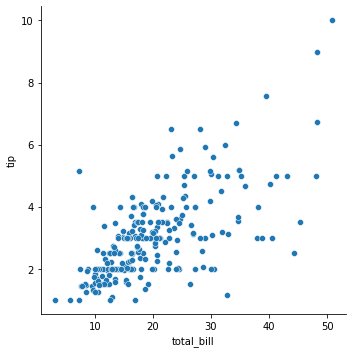

In [4]:
# Visualisation de la relation entre total_bill et tip

sns.relplot(x="total_bill", y="tip", data=tips);

#https://seaborn.pydata.org/generated/seaborn.relplot.html


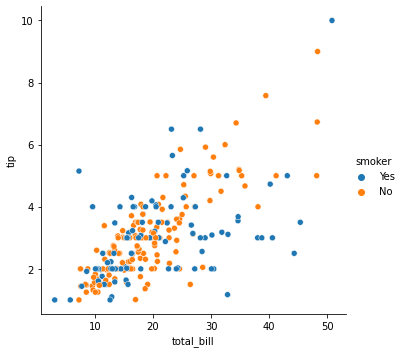

In [5]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

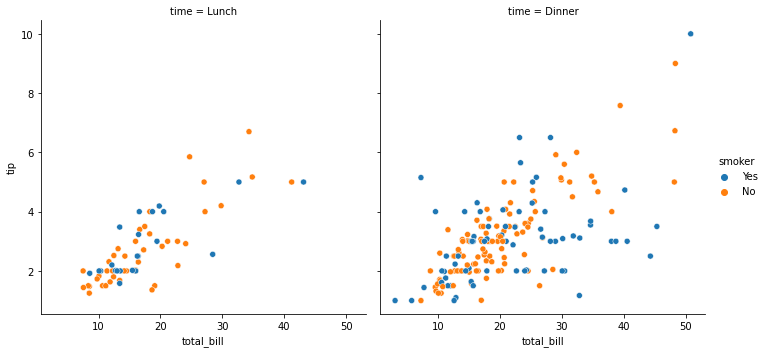

In [6]:
# Plot avec des données catégorielles

sns.relplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = tips);

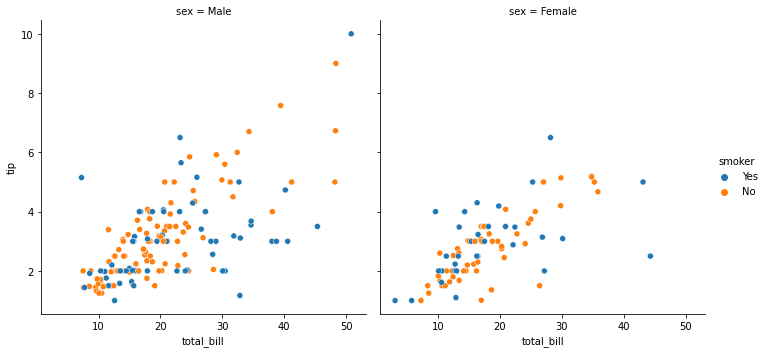

In [7]:
sns.relplot(x = "total_bill", y = "tip", hue = "smoker", col = "sex", data = tips);

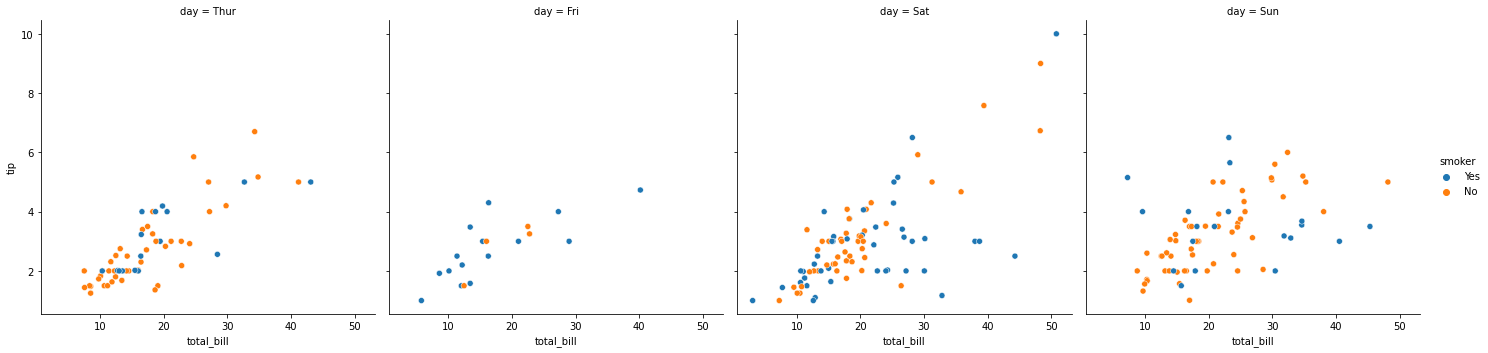

In [8]:
sns.relplot(x = "total_bill", y = "tip", hue = "smoker", col = "day", data = tips);

2) Scatterplot

Si vous ne souhaitez pas utiliser relplot(), la méthode scatterplot() fonctionne déjà parfaitement lorsque nous voulons voir les relations dans les données.

https://seaborn.pydata.org/generated/seaborn.scatterplot.html


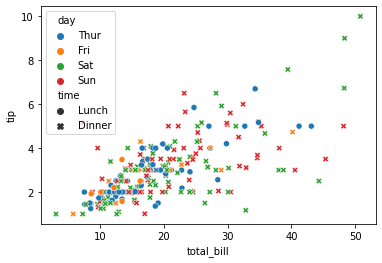

In [9]:
sns.scatterplot(x="total_bill", y="tip", hue="day", style="time", data=tips);

3) Catplot

Lorsque nous travaillons avec des variables catégorielles, nous devons visualiser les données de différentes manières.

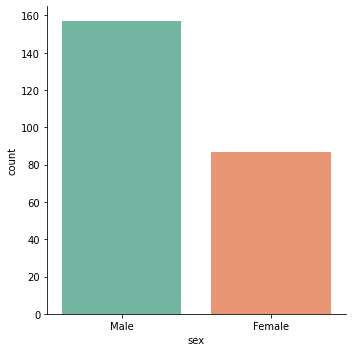

In [10]:
sns.catplot(x="sex", kind="count", palette="Set2", data=tips);

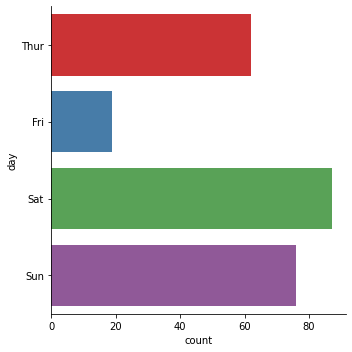

In [11]:
#Graphique à barres horizontales utilisant la colonne day

sns.catplot(y="day", kind="count", palette="Set1", data=tips);

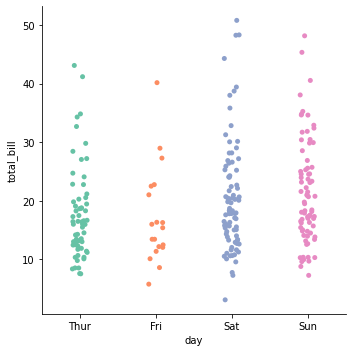

In [12]:
sns.catplot(x="day", y="total_bill", palette="Set2", data=tips);

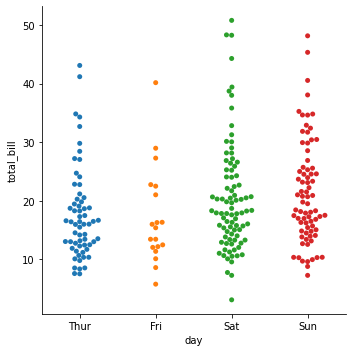

In [13]:
sns.catplot(x="day", y="total_bill", kind='swarm', data=tips);
# Le paramètre swarm empêche le chevauchement des points

La méthode catplot() nous permet d'utiliser facetgrid afin de pouvoir combiner des graphiques en une seule figure.

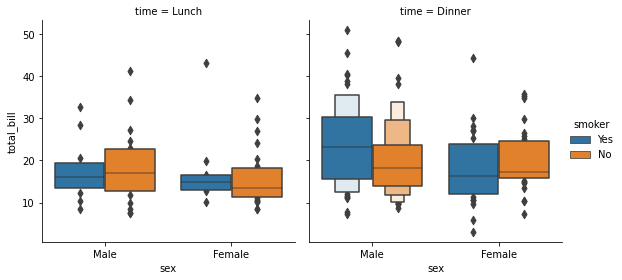

In [22]:
sns.catplot(x="sex", y="total_bill", hue="smoker", col="time", data=tips, kind="boxen",height=4);

3) Régression

https://seaborn.pydata.org/generated/seaborn.lmplot.html


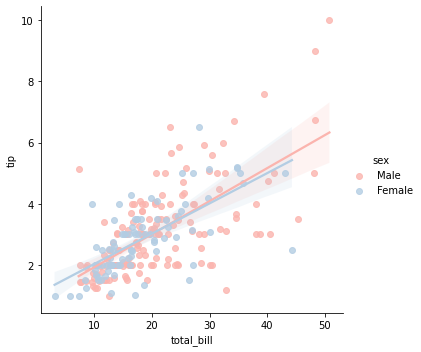

In [14]:
sns.lmplot(x="total_bill", y="tip", hue="sex", palette="Pastel1", data=tips);

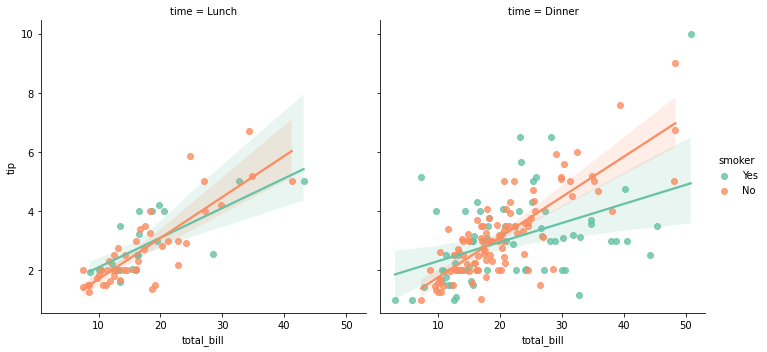

In [15]:
# Utilisation du paramètre col pour séparer les graphiques par le variable time

sns.lmplot(x="total_bill",y="tip", hue="smoker", col="time", palette="Set2", data=tips);

4) Visualiser Outliers


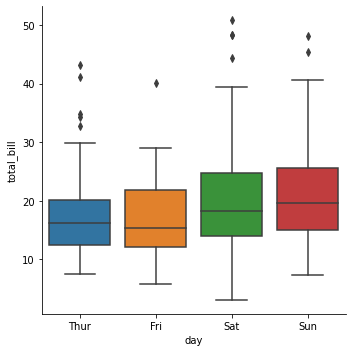

In [16]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

5) Boxplot 

Un box-plot est un graphique simple composé d'un rectangle duquel deux droites sortent afin de représenter certains éléments des données.

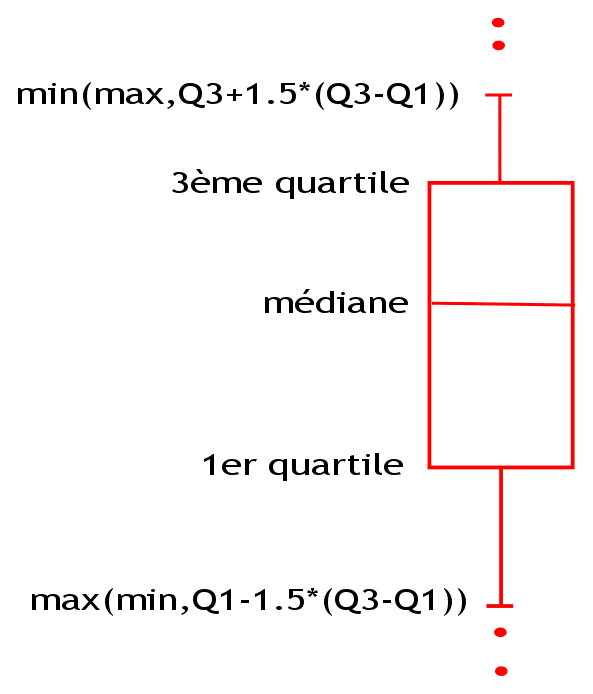

* La valeur centrale du graphique est la médiane (il existe autant de valeur supérieures qu'inférieures à cette valeur dans l'échantillon).

* Les bords du rectangle sont les quartiles (Pour le bord inférieur, un quart des observations ont des valeurs plus petites et trois quart ont des valeurs plus grandes, le bord supérieur suit le même raisonnement).

* Les extrémités des moustaches sont calculées en utilisant 1.5 fois l'espace interquartile (la distance entre le 1er et le 3ème quartile).

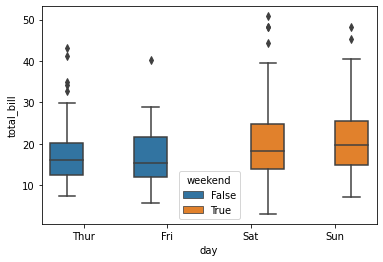

In [34]:
sns.boxplot(x = "day", y = "total_bill", hue = "weekend", data = tips);

6) Stripplot

La méthode stripplot permet de tracer la distribution des données.

https://seaborn.pydata.org/generated/seaborn.stripplot.html

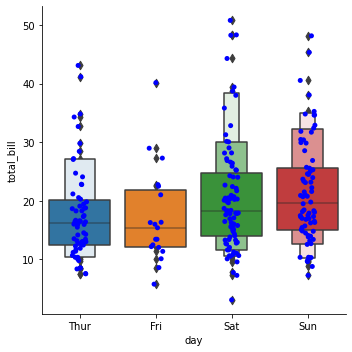

In [21]:
sns.catplot(x="day", y="total_bill", kind="boxen", data=tips);
sns.stripplot(x="day", y="total_bill", data=tips, color="blue");

7) Graphiques de correlation

Utile pour voir s'il existe des corrélations positives ou négatives entre les colonnes

https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [23]:
cor =  tips.corr() # faire la correlation
cor


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Dans le package  pandas, il existe une fonction qui affiche les coefficients de corrélation de toutes les variables, comme dans le tableau ci-dessus, et vous pouvez utiliser ces valeurs pour créer un heatmap, qui affiche les valeurs d'une matrice à l'aide de couleurs. N'oubliez pas que les corrélations ne peuvent être calculées que pour les colonnes numériques.

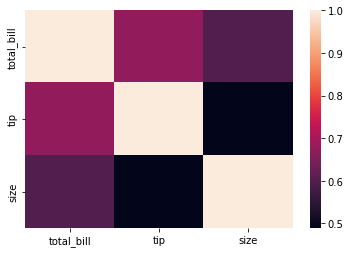

In [24]:
ax = sns.heatmap(cor) # heatmap

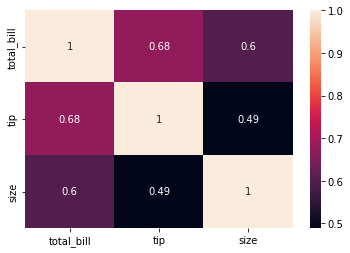

In [25]:
# Affiche les valeurs de corrélation

ax = sns.heatmap(cor, annot=True)


## **Redimensionner les images dans Seaborn**

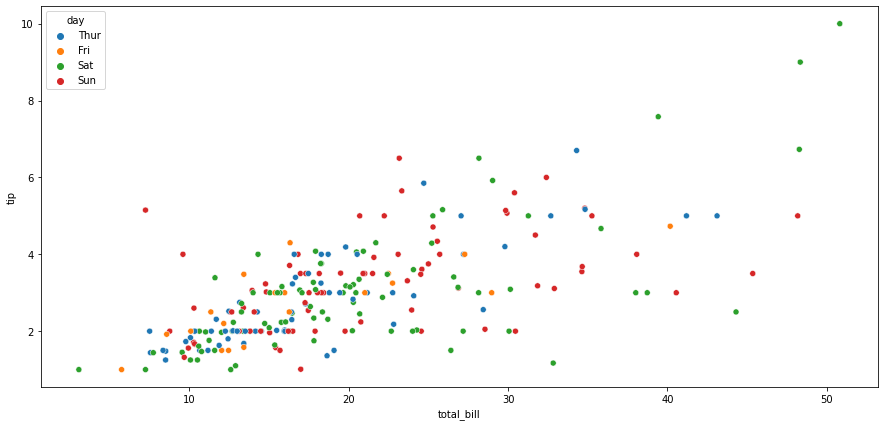

In [17]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15, 7))
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips)

## Palette de couleurs

Les plots Seaborn peuvent utiliser différentes palettes de couleurs. Ces palettes décident des couleurs à utiliser dans les tracés. Peu importe l'ensemble de données que vous utilisez, pour n'importe quel ensemble de données, vous pouvez modifier la palette.

Les palettes ont des noms différents comme "hls", "Blues" et ainsi de suite. Ce sont quelques-uns des choix de palette de couleurs que vous avez. Les autres palettes incluent "profond", "vlag" et "fusée".

https://seaborn.pydata.org/generated/seaborn.color_palette.html

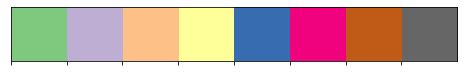

In [18]:
sns.palplot(sns.color_palette("Accent"))

## Données divergentes

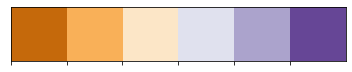

In [19]:
sns.palplot(sns.color_palette("PuOr"))

## Données séquentielles

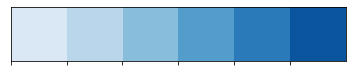

In [26]:
sns.palplot(sns.color_palette("Blues"))

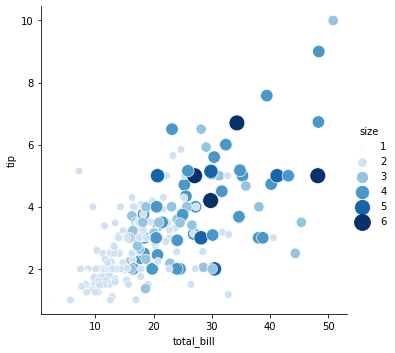

In [28]:
# couleur Blues

sns.relplot(x="total_bill", y="tip", hue="size", palette="Blues", size="size", sizes=(12,250), data=tips);

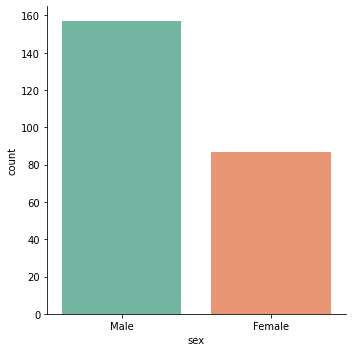

In [29]:
# couleur Set2
sns.catplot(x="sex", kind="count", palette="Set2", data=tips);

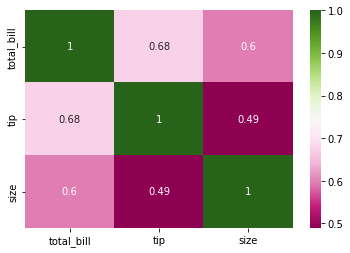

In [31]:
#couleur PiYG

sns.heatmap(tips.corr(), annot=True, cmap="PiYG");